#Capstone Project - The Battle of Neighbourhoods
##Part 1 [Week 1]
________________________________________________
Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This submission will eventually become your **Introduction / Business** Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

1. A description of the problem and a discussion of the background. (15 marks)
2. A description of the data and how it will be used to solve the problem. (15 marks)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The aim of this project is to find the best location to open eatery in the central of **Paris, France**. Specifically, the analysis in this report will be catered to the board of directors who are interested in opening up different shopping malls in densely populated place like Paris.

Based on the past quantative data from other shopping malls, it suggests that the best locations to open shopping mall may not be only near other restaurants. But the data also suggest that the popular areas are in fact close to Fashion outlets, Wine Bars. This could be due to the attributes that Parisians are very sociable people which leads to a high frequency of visits amomg these locations.

The first task would be to **analyse the district data**, all the district data in Paris including names, location data if available and the frequency distribution of each district.

The second task would be to **analyse** each of this district that has the highest frequency distribution of the **Restaurants, Fashion outlets and Wine Bars**, which will enable us to pin-point which districts are the best for opening shopping mall.

Throughout the project, data science tools to analyse data will focus on processing the data and explore the most suitable neighbourhood so that the best neighbourhood can be identified for the shopping mall to be open.

The analysis and recommendations conducted for the new store will only be focusing the on general districts with these establishments, not down to the specific addresses. The results provide will narrow down the best district options for either further research to be conducted as there will be more elements required to open a store front.


## Data <a name="data"></a>


In this section, I will describe the data based on definition of the problem, factors that will influence decisions are:
* finding the suitable resources for the district data for Paris
* conduct exploratory research on the dataset
* Clean the data and convert to a useable dataset for Data Analysis


I will be using the geographical coordinates of Paris, France to plot neighbourhoods in a borough that is within the city's vicinity, and finally cluster the neighborhoods to present findings.

Arrondissements Municipaux for Paris CSV (administrative districts)
Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Using a real world data set from Wikipedia containing all the Arrondissments in Paris](#part1):  A dataset consisting of the Arrondissements in Paris. Based on this dataset, we will be able to clearly separate Paris in to their respective arrondissments, laying the foundation of the research. Such arrangement enable us to understand the characteriitcs of the respective district later on in the analysis e.g. Which district has the least restaurants? Highest number of Shopping mall. 

- [**Part 2**: Data from Foursquare API to explore the Arrondissements of Paris (Neighbourhoods)](#part2): The dataset that consist of all the different shops within each Arrondissements and the respective variables. The data from this Foursquare will be supplementing more details on top of the districts to provide necessary data for other analysis such  as frequency visit, competition analysis, cost price analysis (not covered in this project)

In [0]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


###**Part 1:** Using a real world data set from Wikipedia containing all the Arrondissments in Paris<a name="part1"></a>

Properties of the arrondissments report that is useful for the analysis:
* NAME = Neighbourhood
* CAR = Arrondissement_Num
* LAR = French_Name
* Geometry_X = Latitude
* Geometry_Y = Longitude

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart





In [0]:
# Download the dataset and read it into a pandas dataframe.

# The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

paris = pd.read_csv('https://raw.githubusercontent.com/ethansu1992/Coursera_Capstone/master/arrondissements.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [0]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR.1': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,CAR,Neighborhood,NSQAR,Arrondissement_Num,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [0]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CARINSEE','CARINSEE','NSQCO','SURFACE', 'PERIMETRE','CAR' ], axis=1, inplace=True)
paris


,Neighborhood,Arrondissement_Num,French_Name,Latitude,Longitude
0,Temple,3,3eme Ardt,48.862872,2.360001
1,Buttes-Chaumont,19,19eme Ardt,48.887076,2.384821
2,Observatoire,14,14eme Ardt,48.829245,2.326542
3,Entrepot,10,10eme Ardt,48.876130,2.360728
4,Reuilly,12,12eme Ardt,48.834974,2.421325
5,Passy,16,16eme Ardt,48.860392,2.261971
6,Popincourt,11,11eme Ardt,48.859059,2.380058
7,Bourse,2,2eme Ardt,48.868279,2.342803
8,Hotel-de-Ville,4,4eme Ardt,48.854341,2.357630
9,Batignolles-Monceau,17,17eme Ardt,48.887327,2.306777


In [0]:
# Check the shape of the dataframe
paris.shape

(20, 5)

In [0]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [0]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

###**Part 2:** Data from Foursquare API to explore the Arrondissements of Paris (Neighbourhoods)<a name="part2"></a>

Data Analysis and Location Data:

* Foursquare location data will be used to explore or compare districts around Paris.

* Data manipulation and analysis to derive subsets of the initial data.

* Identifying the high traffic areas using data visualisation and statistical analysis.

In [0]:
CLIENT_ID = 'KOSN3H1ZVDEB3PWLAF3FWM0FF0EP33TXCUWXJHKX2ILFXIKZ' # your Foursquare ID
CLIENT_SECRET = 'QSUVFEHKECE2Y30SWKDAFMUN0B10S2EDJECNWI2SVZKNHTXJ' # your Foursquare Secret
VERSION = '20200517' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KOSN3H1ZVDEB3PWLAF3FWM0FF0EP33TXCUWXJHKX2ILFXIKZ
CLIENT_SECRET:QSUVFEHKECE2Y30SWKDAFMUN0B10S2EDJECNWI2SVZKNHTXJ


In [0]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's French name.

paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

In [0]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [0]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KOSN3H1ZVDEB3PWLAF3FWM0FF0EP33TXCUWXJHKX2ILFXIKZ&client_secret=QSUVFEHKECE2Y30SWKDAFMUN0B10S2EDJECNWI2SVZKNHTXJ&v=20200517&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [0]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eca9fd69388d7001b9d8acf'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4d974096a2c654814aa6d353-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1c5941735',
         'name': 'Sandwich Place',
         'pluralName': 'Sandwich Places',
         'primary': True,
         'shortName': 'Sandwiches'}],
       'id': '4d974096a2c654814aa6d353',
       'location': {'address': '57 rue de Bretagne',
        'cc': 'FR',
        'city': 'Paris',
        'country': 'France',
        'distance': 123,
        'formattedAddress': ['57 rue de Bretagne', '75003 Paris', 'France'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.86391016055883,
          'lng'

### Define a function that extracts the category of the venue

In [0]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [0]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
2,Square du Temple,Park,48.864475,2.360816
3,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
4,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
5,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879
6,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
7,Hôtel Jules & Jim,Hotel,48.863496,2.357395
8,SoMa,Japanese Restaurant,48.861511,2.362146
9,Les Enfants Rouges,Wine Bar,48.863013,2.361260


In [0]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

78 venues were returned by Foursquare.


#Week 2

In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

A full report consisting of all of the following components (15 marks):
Introduction where you discuss the business problem and who would be interested in this project.
Data where you describe the data that will be used to solve the problem and the source of the data. Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why. Results section where you discuss the results.
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
Conclusion section where you conclude the report.
1. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

2. Your choice of a presentation or blogpost. (10 marks)
____________________________________________________________________________

## Methodology <a name="methodology"></a>

* Create a nearby venues function for all the neighborhoods in Paris
* Create a new dataframe called for the venues of Paris called paris-venues
* Check how many venues were returned for each neighborhood
* Calculate how many unique venue categories
* Group rows by neighborhood and take the mean of the frequency of occurrence of each category
* Print each neighborhood with it's top 10 most common venues
* Put that data into a pandas dataframe and sort the venues in descending order


In [0]:
# Create a nearby venues function for all the neighborhoods in Paris
def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [0]:
print(paris_venues.shape)
paris_venues.head(250)

(1477, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
2,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
3,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
4,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
...,...,...,...,...,...,...,...
245,10eme Ardt,48.876130,2.360728,Marché Saint-Quentin,48.876831,2.355234,Farmers Market
246,10eme Ardt,48.876130,2.360728,Bopome,48.871701,2.362483,Asian Restaurant
247,10eme Ardt,48.876130,2.360728,Siseng,48.872217,2.365049,Asian Restaurant
248,10eme Ardt,48.876130,2.360728,Le Comptoir Général,48.872486,2.365670,Bar


In [0]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,64,64,64,64,64,64
12eme Ardt,5,5,5,5,5,5
13eme Ardt,81,81,81,81,81,81
14eme Ardt,46,46,46,46,46,46
15eme Ardt,90,90,90,90,90,90
16eme Ardt,21,21,21,21,21,21
17eme Ardt,48,48,48,48,48,48
18eme Ardt,63,63,63,63,63,63


In [0]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 202 unique venue categories.


In [0]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,Baby Store,Bakery,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,...,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Southwestern French Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,6eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1473,6eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1474,6eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1475,6eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# The shape of the dataframe is
paris_onehot.shape

(1477, 203)

In [0]:
# Group rows by neighborhood and take the mean of the frequency of occurrence of each category
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,Baby Store,Bakery,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,...,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Southwestern French Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.020000,0.000000,0.00,0.00,0.010000,0.000000,0.000000,0.040000,0.000000,0.00,0.000000,0.020000,0.050000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.040000,0.000000,0.010000,0.00,0.01,0.000000,0.00,0.030000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,...,0.000000,0.00,0.040000,0.01,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.000000,0.00,0.000000,0.020000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.020000,0.020000,0.000000,0.000000,0.0,0.00
1,11eme Ardt,0.015625,0.015625,0.000000,0.00,0.00,0.000000,0.015625,0.000000,0.015625,0.000000,0.00,0.000000,0.015625,0.109375,0.00,0.000000,0.00,0.000000,0.015625,0.000000,0.062500,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078125,0.000000,...,0.000000,0.00,0.015625,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.015625,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.015625,0.046875,0.000000,0.000000,0.000000,0.0,0.00
2,12eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.20
3,13eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.135802,0.000000,0.00,0.000000,0.024691,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.012346,0.000000,0.000000,0.000000,0.012346,0.000000,0.000000,0.012346,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.037037,0.012346,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.086420,0.000000,0.00,0.012346,0.000000,0.000000,0.00,0.00,0.197531,0.000000,0.000000,0.000000,0.000000,0.0,0.00
4,14eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.065217,0.021739,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.065217,0.000000,0.000000,0.00,0.00,0.021739,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,...,0.000000,0.00,0

In [0]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                venue  freq
0   French Restaurant  0.14
1               Hotel  0.08
2         Coffee Shop  0.05
3                 Bar  0.05
4    Asian Restaurant  0.04
5   Indian Restaurant  0.04
6  Seafood Restaurant  0.04
7              Bistro  0.04
8  Italian Restaurant  0.03
9         Pizza Place  0.03


----11eme Ardt----
                venue  freq
0                 Bar  0.11
1   French Restaurant  0.09
2                Café  0.08
3              Bistro  0.06
4  Italian Restaurant  0.05
5            Wine Bar  0.05
6          Restaurant  0.05
7         Pastry Shop  0.03
8        Cocktail Bar  0.03
9         Coffee Shop  0.03


----12eme Ardt----
                 venue  freq
0          Zoo Exhibit   0.2
1                  Zoo   0.2
2          Supermarket   0.2
3  Monument / Landmark   0.2
4               Bistro   0.2
5         Optical Shop   0.0
6  Moroccan Restaurant   0.0
7        Movie Theater   0.0
8               Museum   0.0
9          Music Store   0.0


--

In [0]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# The top 10 venue categories for each neighborhood
This piece of information will be very important because we are able to identify all the top 10 venues categories in each neighbourhood enabling us to determine which areas has a higher of competition.

In [0]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Hotel,Coffee Shop,Bar,Seafood Restaurant,Asian Restaurant,Bistro,Indian Restaurant,Italian Restaurant,Restaurant
1,11eme Ardt,Bar,French Restaurant,Café,Bistro,Restaurant,Wine Bar,Italian Restaurant,Pastry Shop,Cocktail Bar,Coffee Shop
2,12eme Ardt,Zoo Exhibit,Bistro,Monument / Landmark,Supermarket,Zoo,Argentinian Restaurant,Comfort Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,French Restaurant,Chinese Restaurant,Juice Bar,Supermarket,Japanese Restaurant,Hotel,Gym / Fitness Center
4,14eme Ardt,French Restaurant,Hotel,Bistro,Bakery,Supermarket,Sushi Restaurant,Pizza Place,Bar,Convenience Store,Dessert Shop
5,15eme Ardt,French Restaurant,Hotel,Italian Restaurant,Coffee Shop,Park,Supermarket,Sushi Restaurant,Bakery,Lebanese Restaurant,Indian Restaurant
6,16eme Ardt,Plaza,Lake,Garden,Park,Castle,French Restaurant,Boat or Ferry,Diner,Cafeteria,Trail
7,17eme Ardt,Hotel,Italian Restaurant,French Restaurant,Japanese Restaurant,Bakery,Plaza,Bistro,Diner,Pastry Shop,Mediterranean Restaurant
8,18eme Ardt,Bar,French Restaurant,Coffee Shop,Pizza Place,Hotel,Fast Food Restaurant,Supermarket,Convenience Store,Italian Restaurant,Gastropub
9,19eme Ardt,Bar,French Restaurant,Supermarket,Japanese Restaurant,Restaurant,Café,Bistro,Pizza Place,Beer Bar,Seafood Restaurant


In [0]:
# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

## Analysis <a name="analysis"></a>


Based on the initial analysis from Figure 1, we can identify that there are several potential Arrondissement within the central location to build the shopping mall; around 1-9 Arrondissment Temple (3 eme Ardt), Hotel-de-Ville (4eme Ardt) etc. These locations serve as the prime spot because of their human traffic movement and density and proximity to the tourist sites which is ideal for shopping malls to be location. 

The business types criteria were specified by the client namely that the based on previous trends, 'Ice Cream Shop', 'Cafés' and 'Wine Bars' should be around the location where the ‘Shopping Mall' as it will generate addition value in drawing crowd towards the neighbourhood. Therefore, let’s take a look at the frequency of the occurrence throughout the Paris neighbourhoods, isolating the categorical venues. In addition, French restaurant will also be added into the analysis for the client in hope to identify the district with high density of French Restaurant. These would value add to the shopping mall.  Hence, the goal of the analysis is to identify the suitable location of which we can maximise the value-added services from surrounding business to complement the shopping mall.

These are the venue categories that the client wants to have an abundant density of for the ideal store location. Therefore, for better visualisation, a violin plot from the seaborn library - the choice of the plot would greatly visualise the frequency distribution datasets, they display a density estimation of the underlying distribution. Hence, based on the results display on the violin plot we will be able to narrow down the specific district for the client.


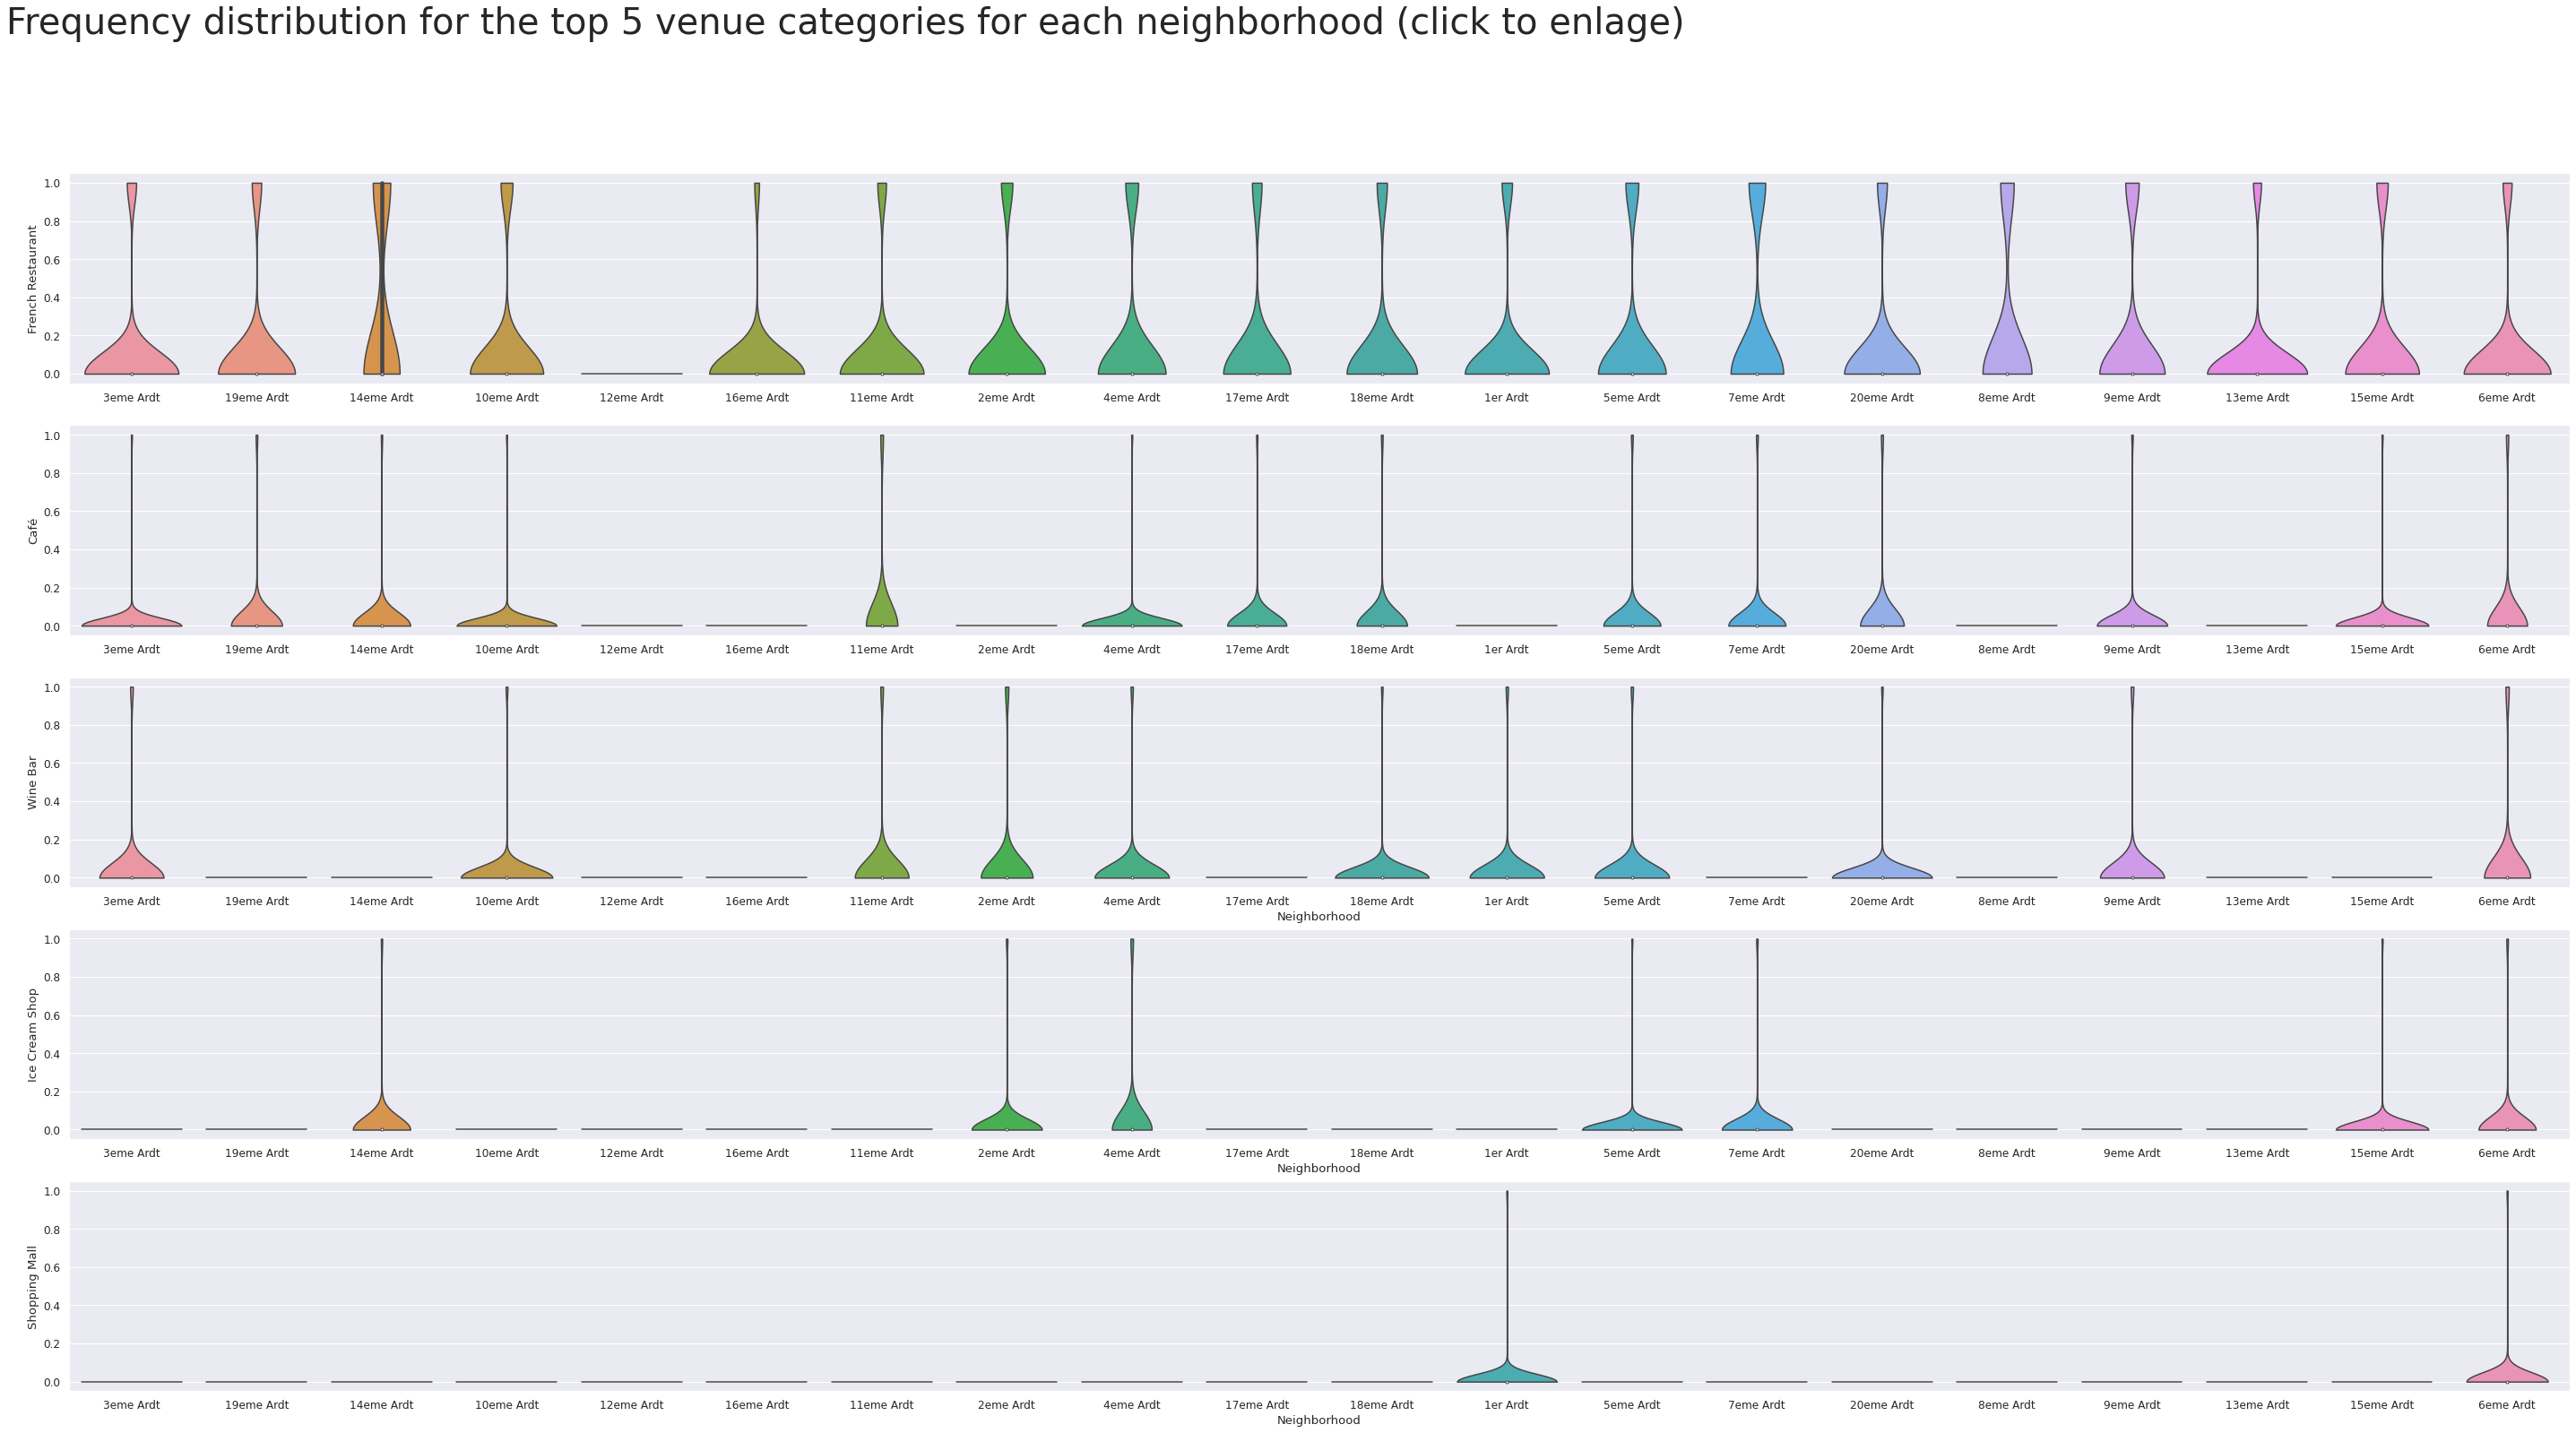

In [0]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(5,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(5,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(5,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(5,1,4)
sns.violinplot(x="Neighborhood", y="Ice Cream Shop", data=paris_onehot, cut=0);

plt.subplot(5,1,5)
sns.violinplot(x="Neighborhood", y="Shopping Mall", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 5 venue categories for each neighborhood (click to enlage)', fontsize=40)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

## Analysis of the Neighbourhood
From the analysis, we identify that majority of the districts in Paris have high density of restaurants within them. And according to the pre-specified criteria by the client, there are 9 neighbourhood identified that are suitable to open new shopping malls and they are as follows:


Neighbourhoods
1. 3eme Ardt
2. 10eme Ardt
3. 14eme Ardt
4. 4eme Ardt
5. 18eme Ardt
6. 11eme Ardt
7. 15eme Ardt
8. 9eme Ardt

However, apart from the criteria specified by Grandeur, more explorative analysis can be down to further rank the neighbourhood accordingly. Based on these 8 neighbourhoods, we will include ‘Clothing_store” venue category into the analysis then we will be able make inferential analysis from the data using domain knowledge because clothing store is considered as a direct competition to Grandeur shopping mall investment. Therefore, based on our analysis in the frequency of Clothing store in each neighbourhood, 2eme Ardt and 4 eme Ardt present a high frequency as shown in the figure below. This indicates to us that these 2 neighbourhood should be ranked as the last or excluded from the investment plans for Grandeur to minimise the competition intensity which might lead to lower ROI. 



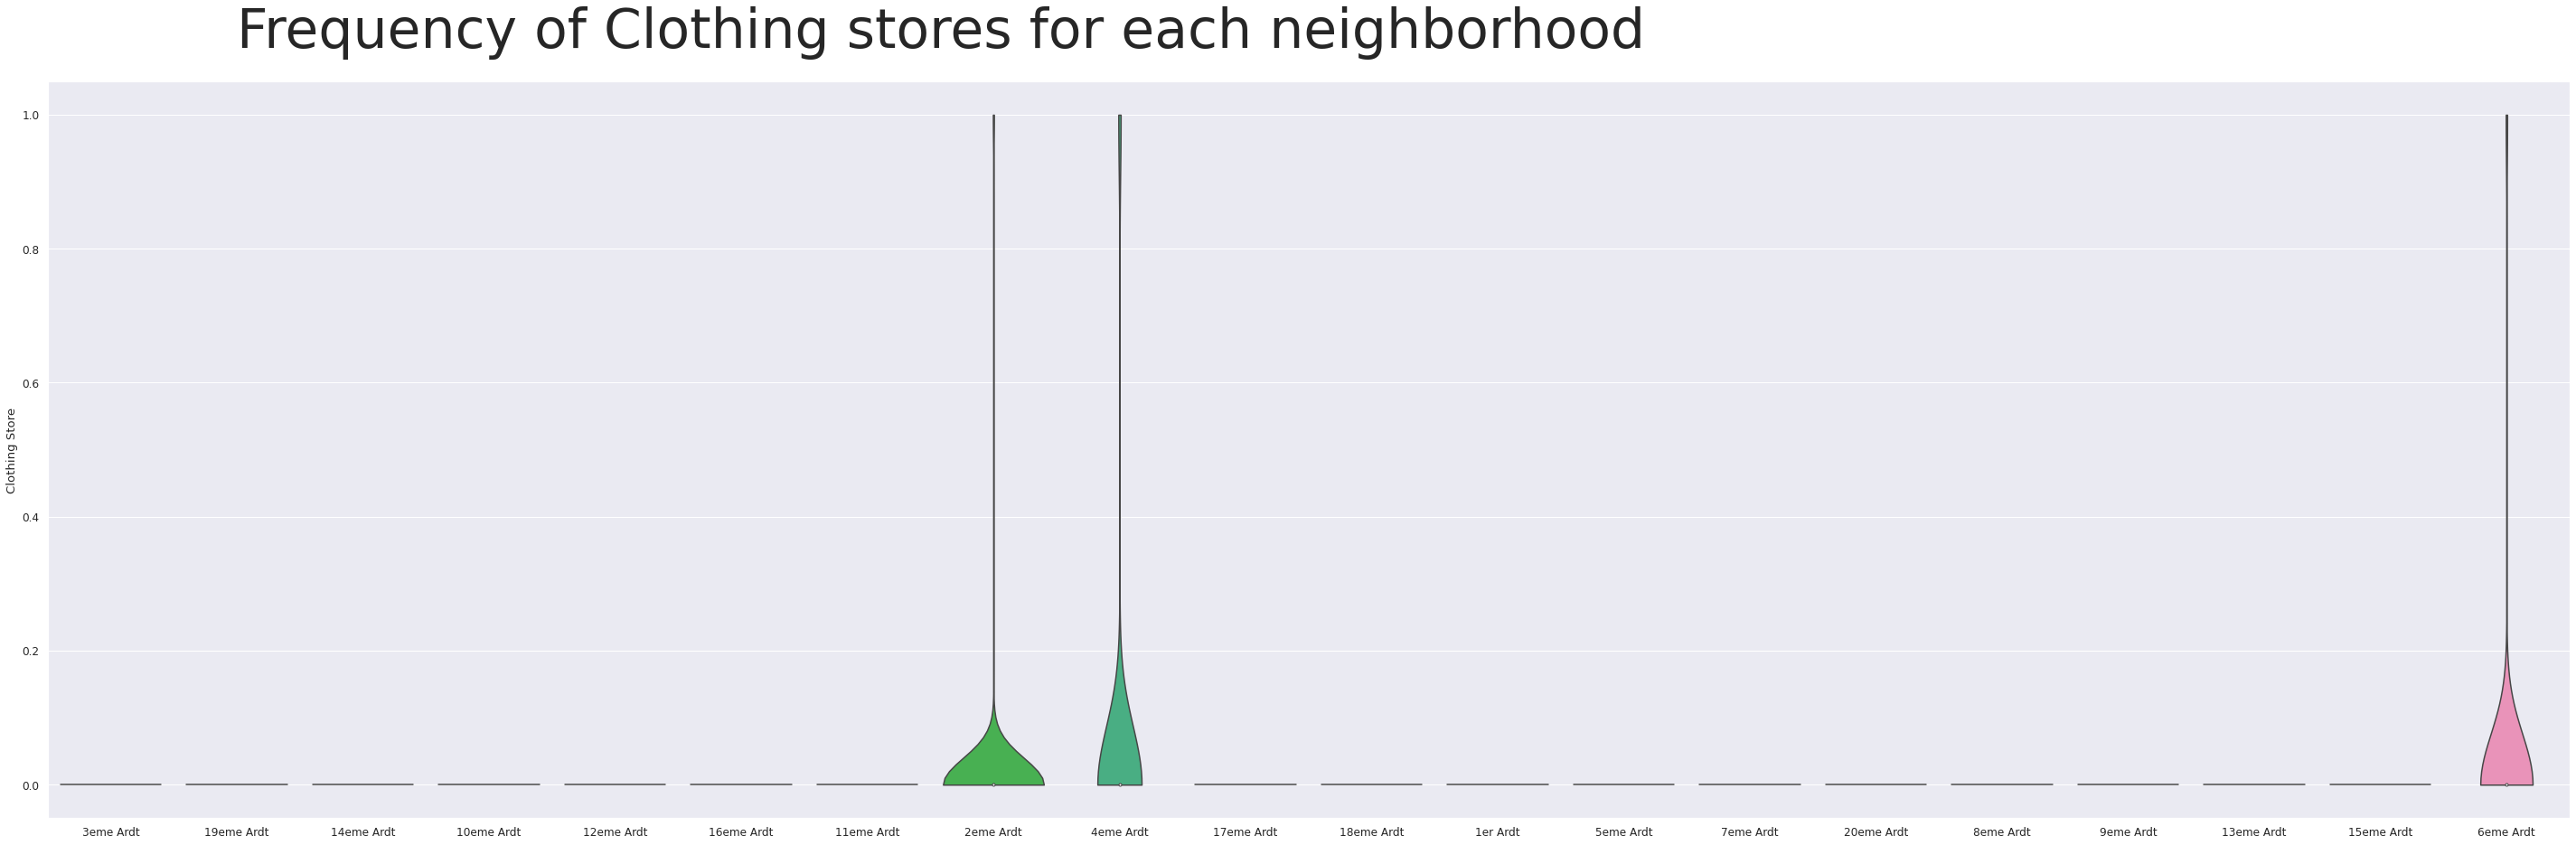

In [0]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

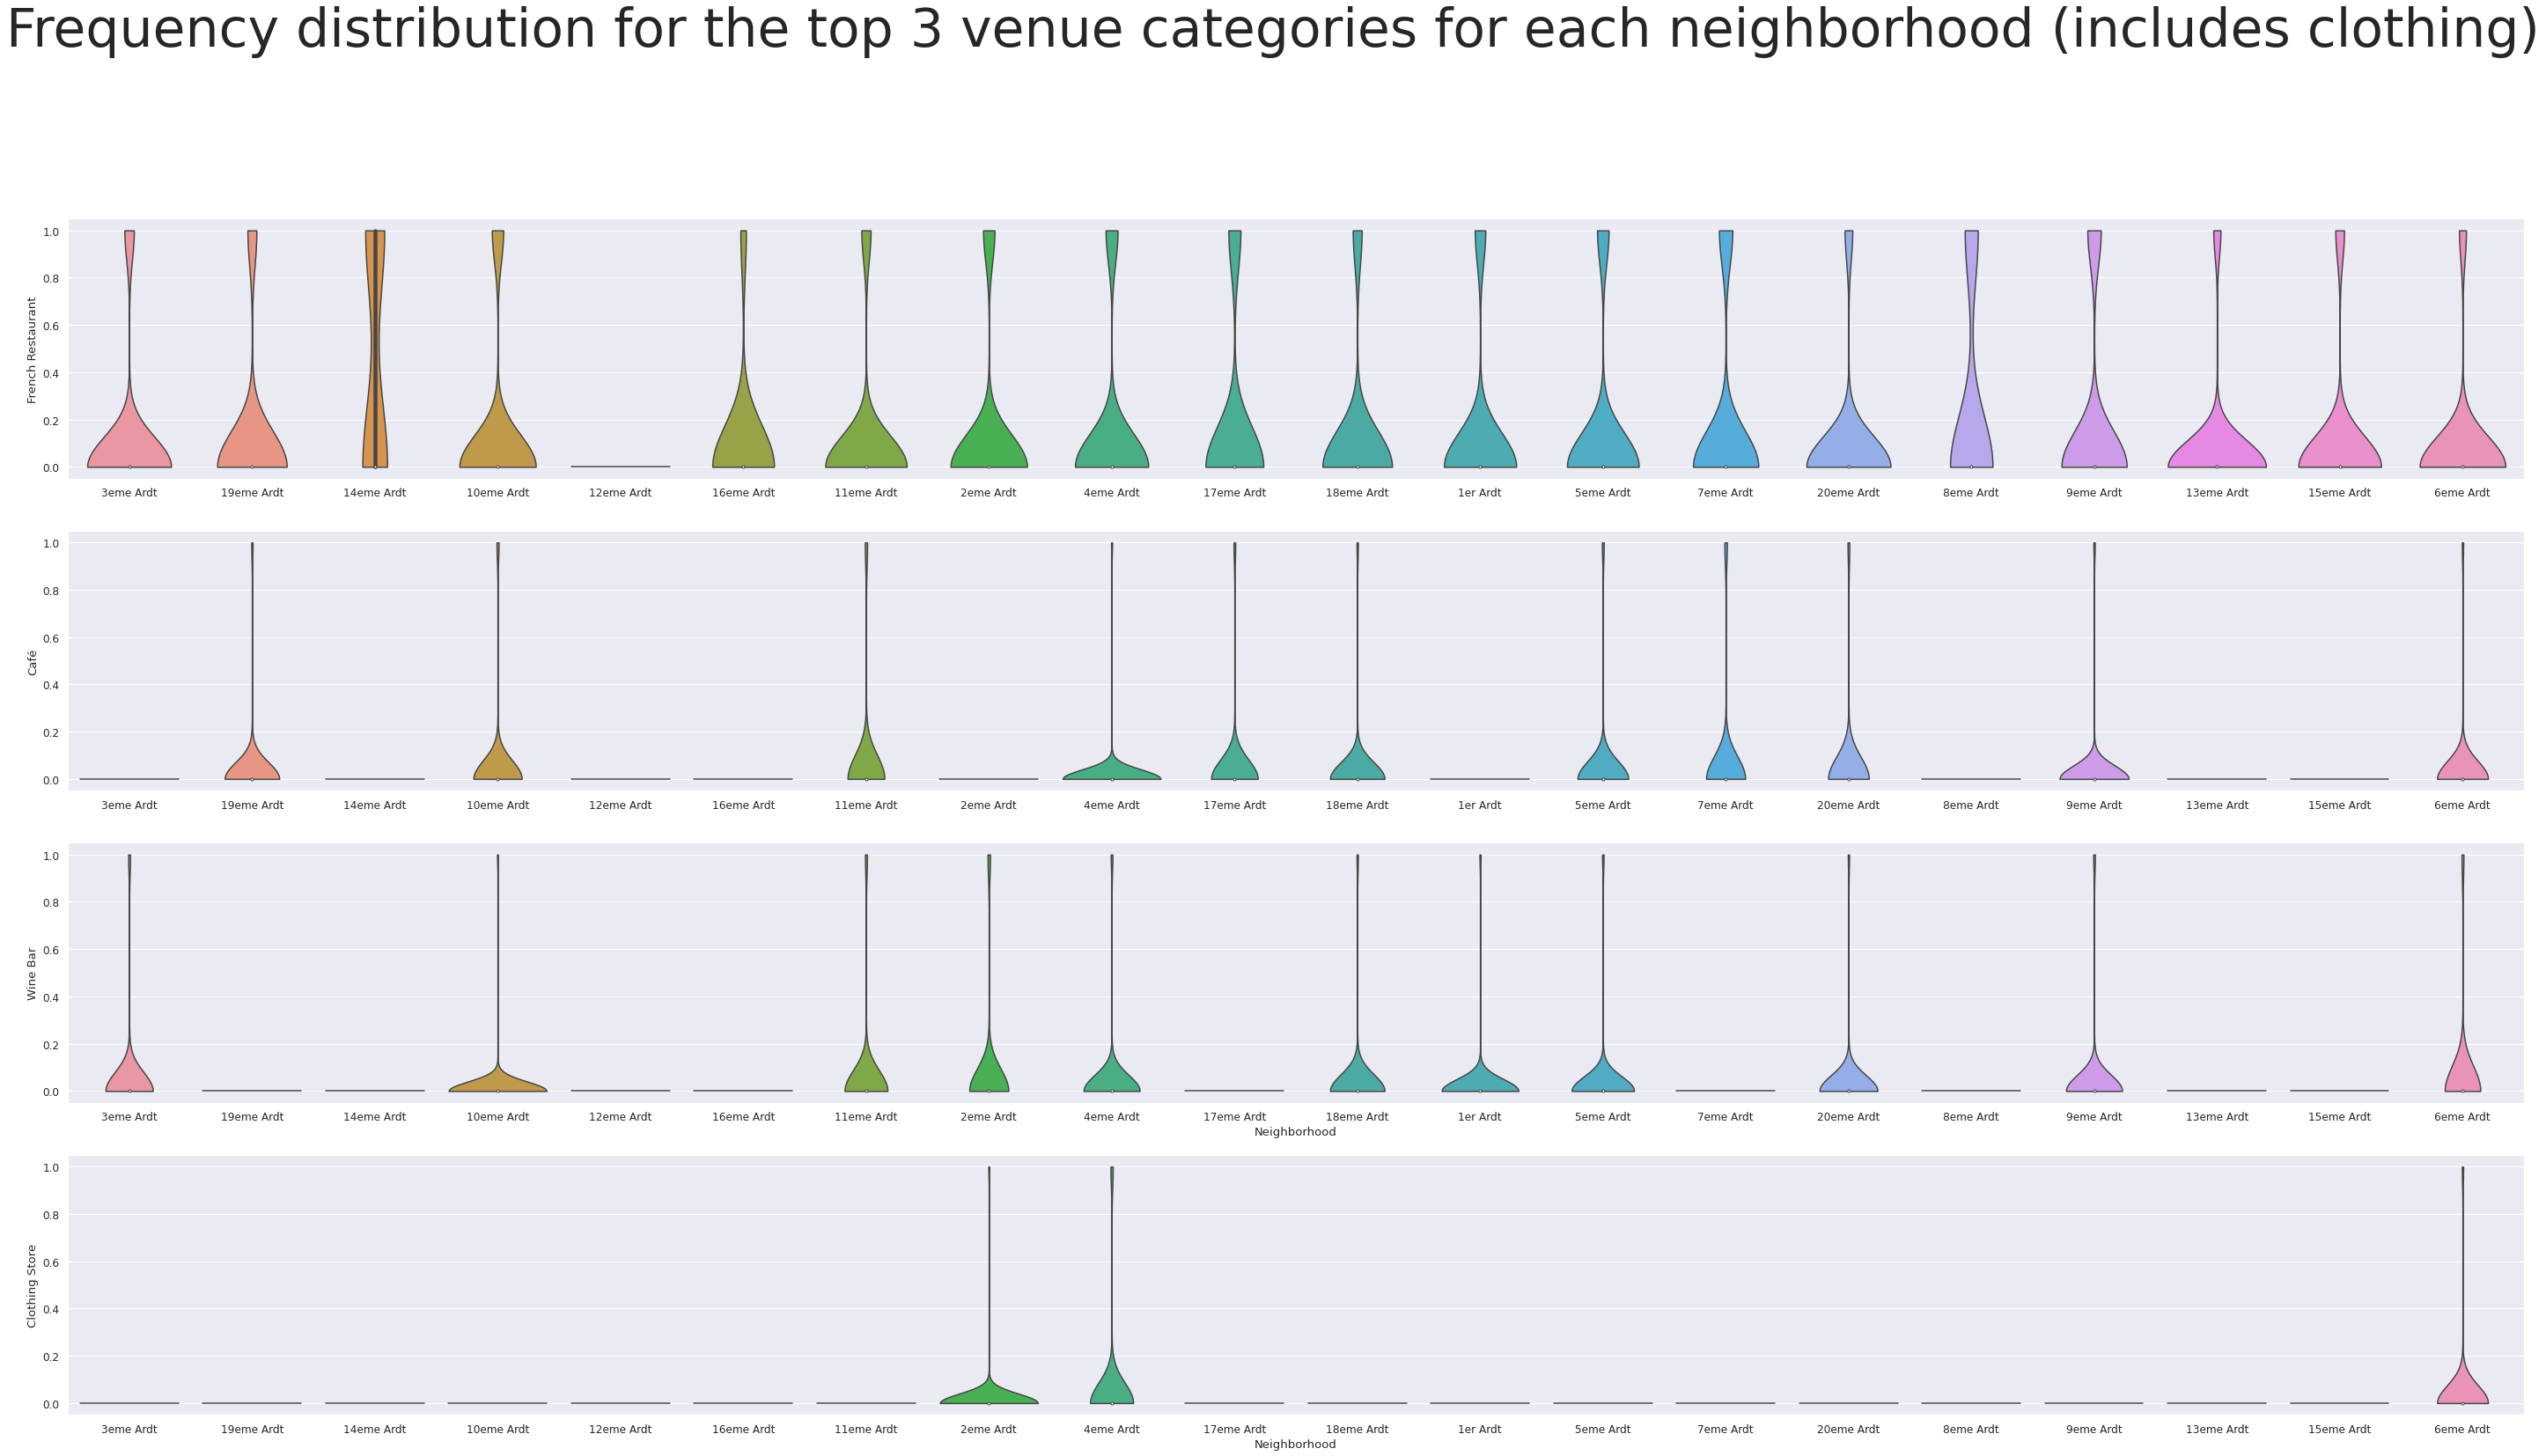

In [0]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

## Results and Discussion <a name="results"></a>


# Chosen Neighborhoods
Inferential analysis using the data, as well as domain knowledge of retail and marketing, allow the list to be focussed to just 3 neighbourhoods from the previous 8.

After the series of analysis, the results from the inferential analysis using the data together with the domain knowledge in retailing and real estate investment, the list of focus neighbourhoods are reduced to just 3 instead of the previous 9.  The reasoning for the 3 choices was that we have tighten the criteria of the client requirement from best to have either “French restaurant”, “Café Bar”, “ wine Bar” and “ice-cream shop” to the criteria of at least 3 out of 4 requirements must be met. The rational for this is to ensure that each shopping mall is able to capture at least 75% of the traffic due to the presence of these shops around it. If we loosen such criteria, the combinational location will not be able to bring out the maximum impact on the profit for Grandeur. 
The increase in the criteria to have the inclusion of more category, eventually enable us to narrow down and rank the suggest districts for the new stores and provide better location for the brand.
Therefore, the final 3 prospective neighbourhood that met all the criteria are:

1.	3eme Ardt: Arrondissement 3, Temple
2.	4eme Ardt: Arrondissement 4, Hotel-de-Ville
3.	6eme Ardt: Arrondissement 6, Luxembourg


In [0]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


###Neighbourhood on the map of Paris.

In [0]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

In [0]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

## Conclusion <a name="conclusion"></a>

In conclusion, there could be other methodologies to conduct the analysis based on the dataset that has been collected. This methodology that has been selected is mainly due to the simplicity in execution and the appropriate visualization of the data analysis. In addition, the output can meet the criteria of Grandeur in identifying their requirement of the venues within each neighbourhood. However, if given more domain knowledge on setting up a shopping mall, more variables could be added into the data for a detailed analysis. The analysis and the results can be further process with the inclusion of human traffic density and competition intensity.
Without the analysis from the dataset, Grandeur might result in opening their shopping mall in a substandard area which will decrease their ROI. Hence a data driven decision will definitely lead to a better solution and strategy planning. 